# Tesina

In [6]:
import pandas as pd
import numpy as np
import numpy.linalg as alg
import matplotlib.pyplot as plt
from scipy import stats

### Importacion de Datos

In [7]:
import glob
import os

# Directorio donde están los archivos
directorio = "Datos"

# Usar glob para encontrar todos los archivos que coincidan con el patrón
archivos = glob.glob(os.path.join(directorio, '*_Cotizaciones_Historicas*.xlsx'))

# Crear una lista para almacenar los DataFrames
dataframes = []

for archivo in archivos:
    nombre_instrumento = os.path.basename(archivo).split('_')[0]
    print(nombre_instrumento)

    df = pd.read_excel(archivo, engine='openpyxl', index_col='Fecha Cotización')['Cierre ajustado'].rename(nombre_instrumento) 
    df = df[~df.index.duplicated(keep='first')]
    #df = df.pct_change().dropna()
    dataframes.append(df)
    
df = pd.concat(dataframes, axis=1)

BBAR
BMA
BPAT
CEPU
GGAL
PAMP
TECO2
TGSU2
TXAR
YPFD


### Ajuste CER

In [8]:
cer = pd.read_csv("CER.txt", sep="\s+", index_col="Fecha")
cer.index = pd.to_datetime(cer.index, format="%d/%m/%Y")
cer = pd.merge(cer, pd.Series(df.index), left_index = True, right_on="Fecha Cotización")
cer = cer[~cer.index.duplicated(keep='first')]

precios = df.div(cer["CER"].values, axis=0)
retornos = precios.pct_change()

### Train y Test

In [9]:
train_retornos = retornos.loc["2019-09-30":"2023-03-10"]
test_retornos = retornos.loc["2023-03-10":]

train_precios = precios.loc[:"2023-03-10"]
test_precios = precios.loc["2023-03-10":]

### Estadisticas Descriptivas

In [10]:
precios

,BBAR,BMA,BPAT,CEPU,GGAL,PAMP,TECO2,TGSU2,TXAR,YPFD
Fecha Cotización,,,,,,,,,,
2018-10-01,14.693977,15.663535,3.760566,3.821752,9.577913,4.758364,13.140802,10.975770,1.586121,56.182578
2018-10-02,14.872614,15.878537,3.835668,3.826267,9.955815,4.587760,13.067594,10.496381,1.504184,55.891699
2018-10-03,14.623589,15.571893,3.661766,3.736879,9.520590,4.572512,13.144799,10.375002,1.497568,55.283270
2018-10-04,13.789126,14.661203,3.492995,3.432044,8.889556,4.313497,13.128036,9.860093,1.425330,53.326082
2018-10-05,13.148776,14.525464,3.399577,3.245050,8.559816,4.303321,12.736706,9.884995,1.395419,50.930903
...,...,...,...,...,...,...,...,...,...,...
2024-09-24,9.989529,18.217464,4.694005,2.631650,11.665192,6.358926,4.275089,11.042189,1.871157,60.098297
2024-09-25,9.578951,17.634709,4.676845,2.628044,11.370311,6.275125,4.215597,10.748162,1.823540,58.996898
2024-09-26,9.447991,17.246333,4.616875,2.570882,11.354728,6.137981,4.113411,10.187119,1.791048,58.326883


In [11]:
media_train_retornos = train_retornos.mean()

media_train_retornos.to_excel("Tablas/media.xlsx")
media_train_retornos

BBAR     0.001058
BMA      0.000617
BPAT     0.000414
CEPU     0.001735
GGAL     0.000849
PAMP     0.001536
TECO2   -0.000006
TGSU2    0.001058
TXAR     0.001792
YPFD     0.001228
dtype: float64

In [12]:
std_train_retornos = train_retornos.std()

std_train_retornos.to_excel("Tablas/std.xlsx")
std_train_retornos

BBAR     0.040107
BMA      0.039127
BPAT     0.030797
CEPU     0.038975
GGAL     0.038119
PAMP     0.034924
TECO2    0.033653
TGSU2    0.036024
TXAR     0.032546
YPFD     0.040854
dtype: float64

In [13]:
skew_train_retornos = train_retornos.skew()

skew_train_retornos.to_excel("Tablas/skew.xlsx")
skew_train_retornos

BBAR     0.362375
BMA      0.432099
BPAT     1.077624
CEPU     0.354994
GGAL     0.367690
PAMP     0.414006
TECO2    0.416685
TGSU2    0.154632
TXAR     0.271823
YPFD    -0.011573
dtype: float64

In [14]:
kurtosis_train_retornos = train_retornos.kurtosis()

kurtosis_train_retornos.to_excel("Tablas/kurtosis.xlsx")
kurtosis_train_retornos

BBAR      4.982010
BMA       4.797085
BPAT     17.439766
CEPU      4.547241
GGAL      6.302559
PAMP      4.854192
TECO2     7.357293
TGSU2     4.467076
TXAR      8.749798
YPFD      6.063063
dtype: float64

### Figuras

In [15]:
if not os.path.exists("Figuras"):
    os.makedirs("Figuras")

#### Precios

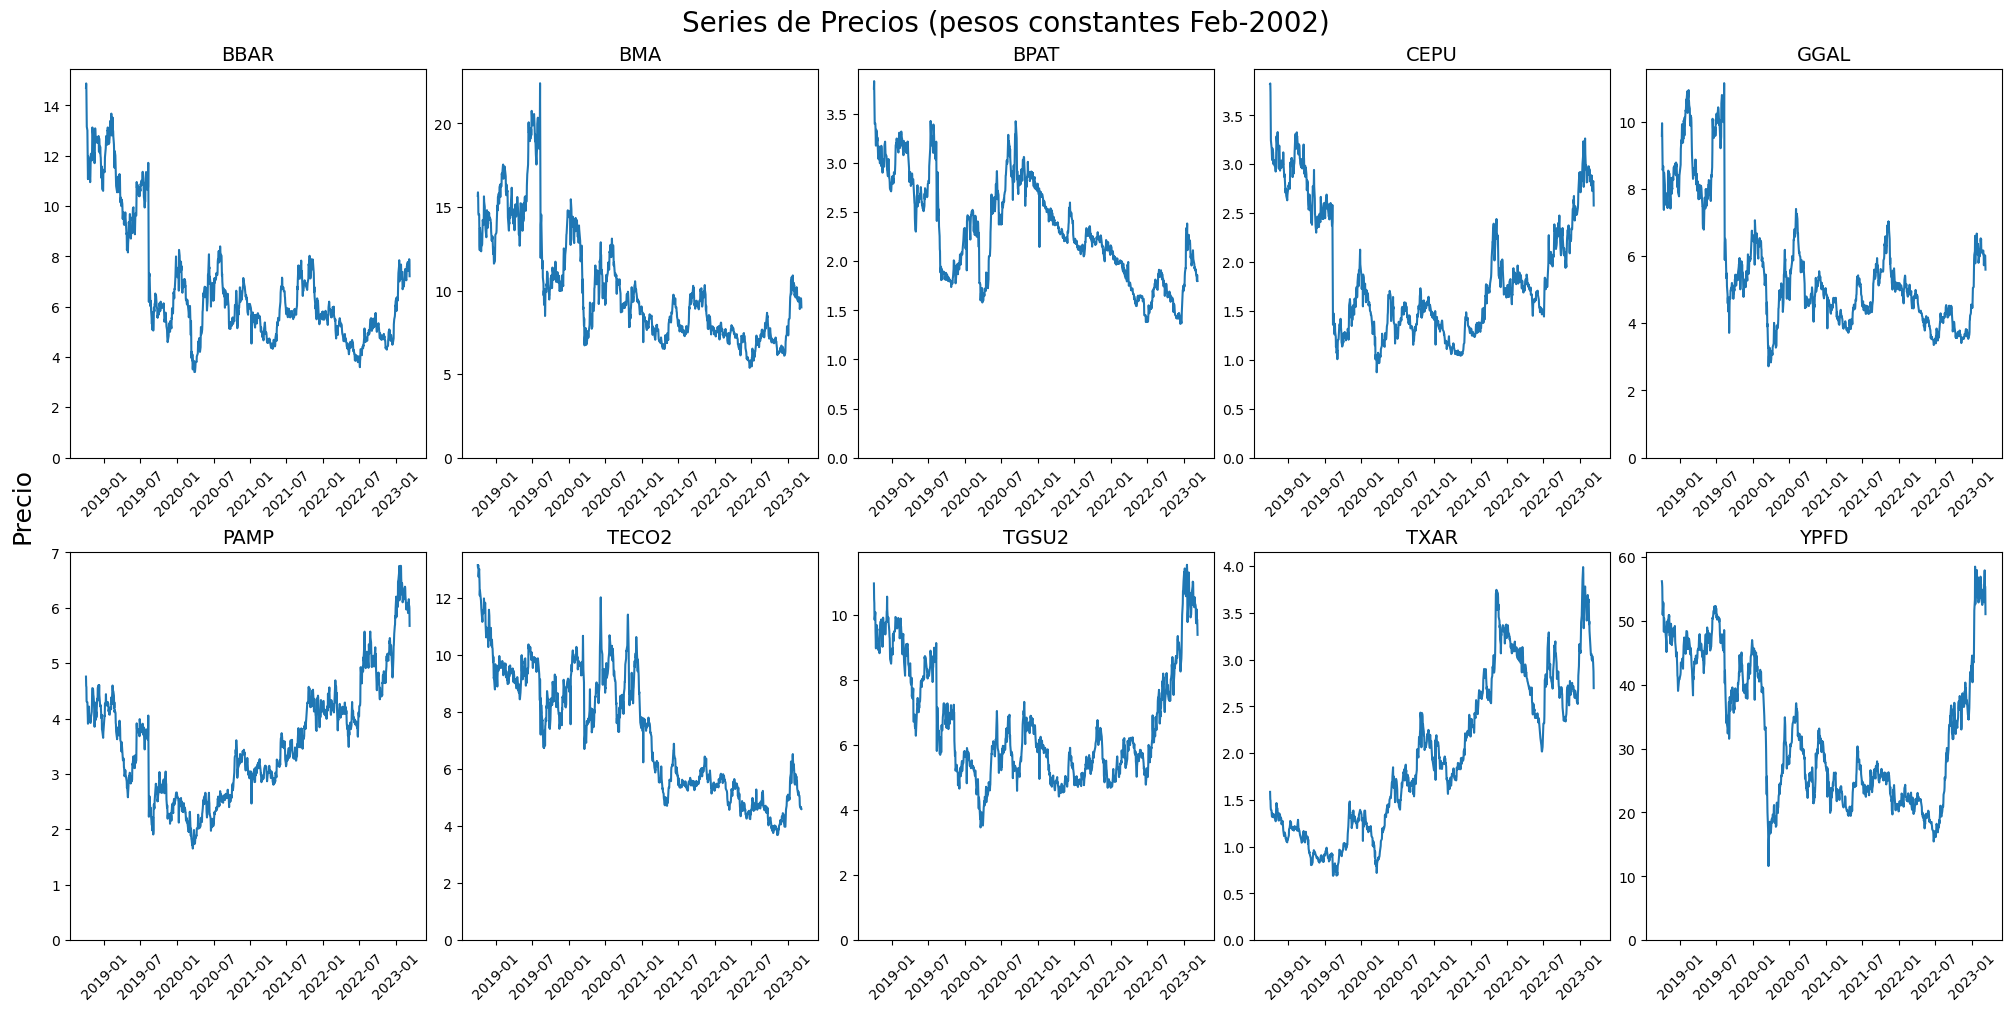

In [81]:
fig = plt.figure(figsize=(20, 10), constrained_layout=True)
ax_array = fig.subplots(2, 5, squeeze=False)
sec_array = np.array(list(train_precios.columns)).reshape(2, 5)

for i, row in enumerate(sec_array):
    for j, element in enumerate(row):
        ax_array[i, j].plot(train_precios[sec_array[i, j]])
        ax_array[i, j].set_title(sec_array[i, j], fontsize=14)
        ax_array[i, j].set_ylim(bottom=0)
        ax_array[i, j].tick_params(axis='x', rotation=45)  

        
fig.supylabel("Precio", fontsize=18)
fig.suptitle("Series de Precios (pesos constantes Feb-2002)", fontsize=20)


plt.savefig("Figuras/Serie_Precios.png", dpi=400)
 

#### Retornos

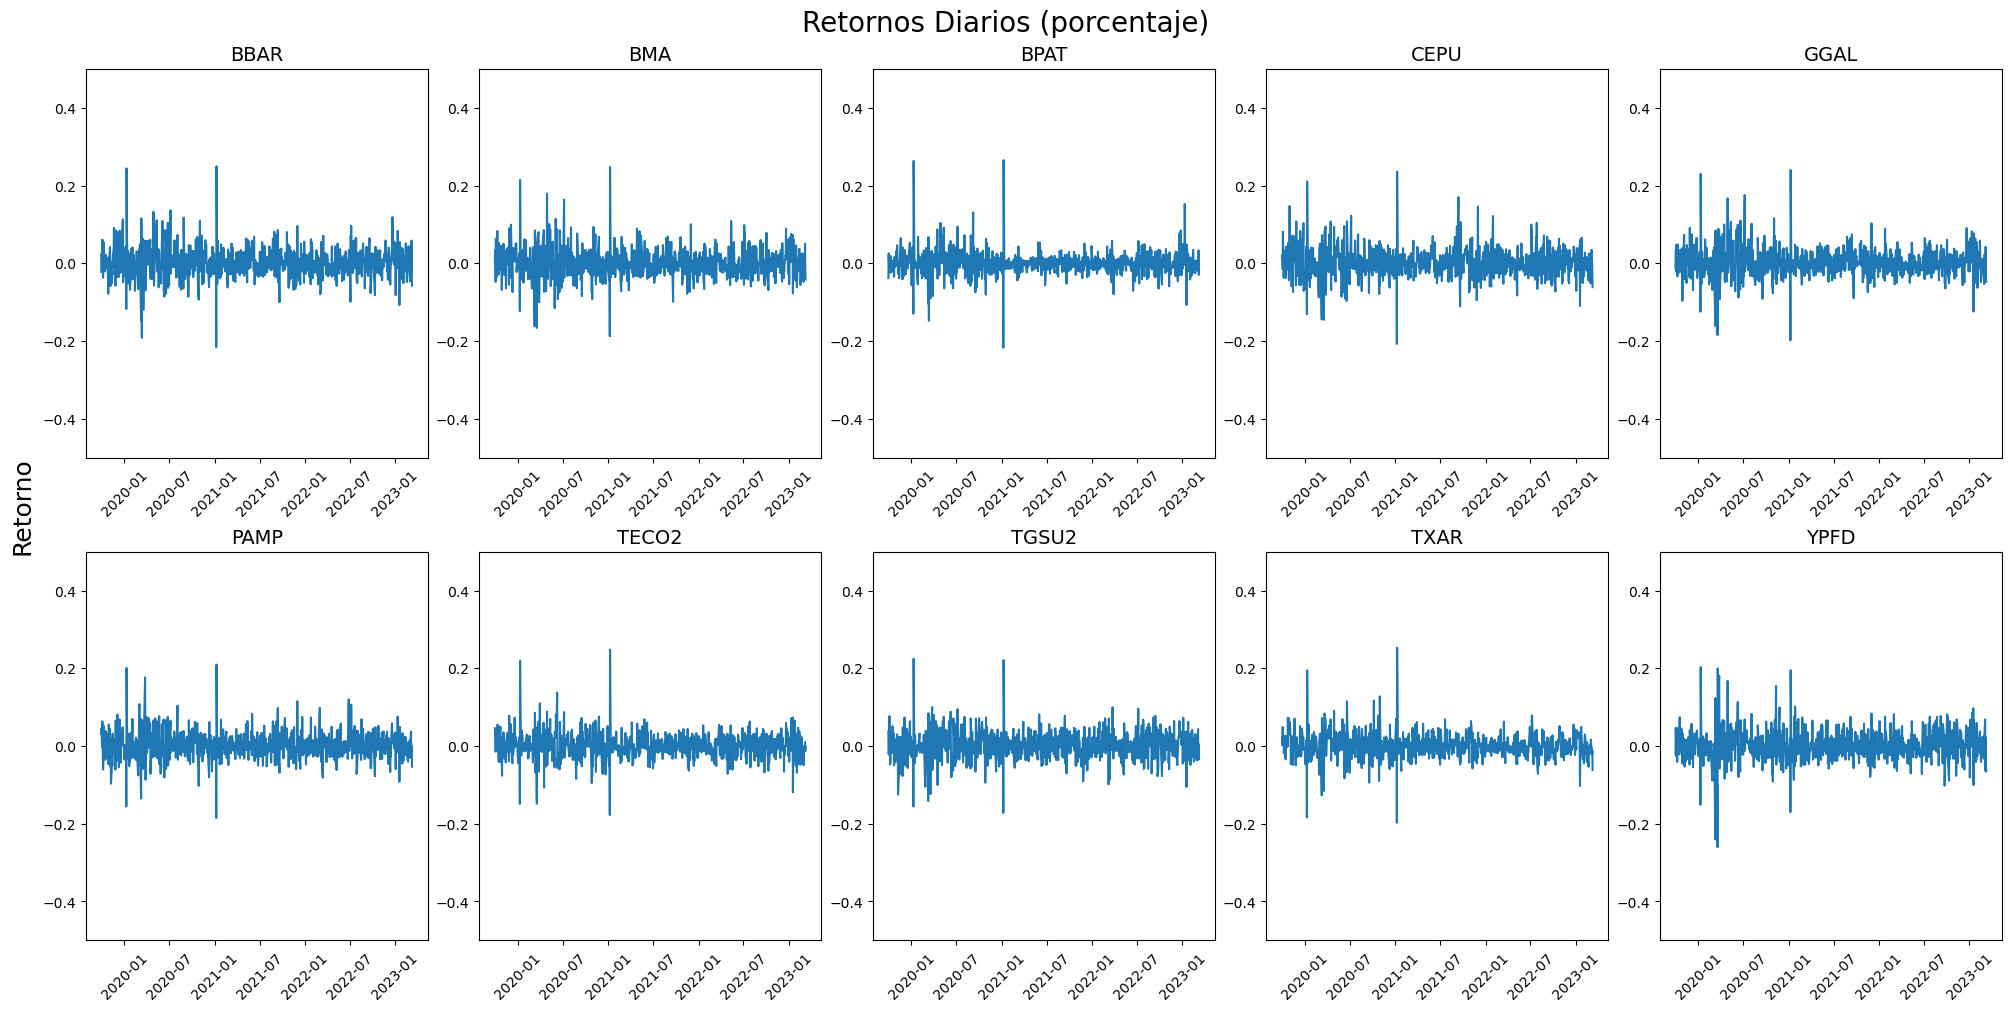

In [17]:

fig = plt.figure(figsize=(20, 10), constrained_layout=True)
ax_array = fig.subplots(2, 5, squeeze=False)
sec_array = np.array(list(train_retornos.columns)).reshape(2, 5)

for i, row in enumerate(sec_array):
    for j, element in enumerate(row):
        ax_array[i, j].plot(train_retornos[sec_array[i, j]])  
        ax_array[i, j].set_title(sec_array[i, j], fontsize=14)
        ax_array[i, j].set_ylim([-0.5, 0.5])
        ax_array[i, j].tick_params(axis='x', rotation=45)  


fig.supylabel("Retorno", fontsize=18)
fig.suptitle("Retornos Diarios (porcentaje)", fontsize=20)

plt.savefig("Figuras/Serie_Retornos.png", dpi=400)

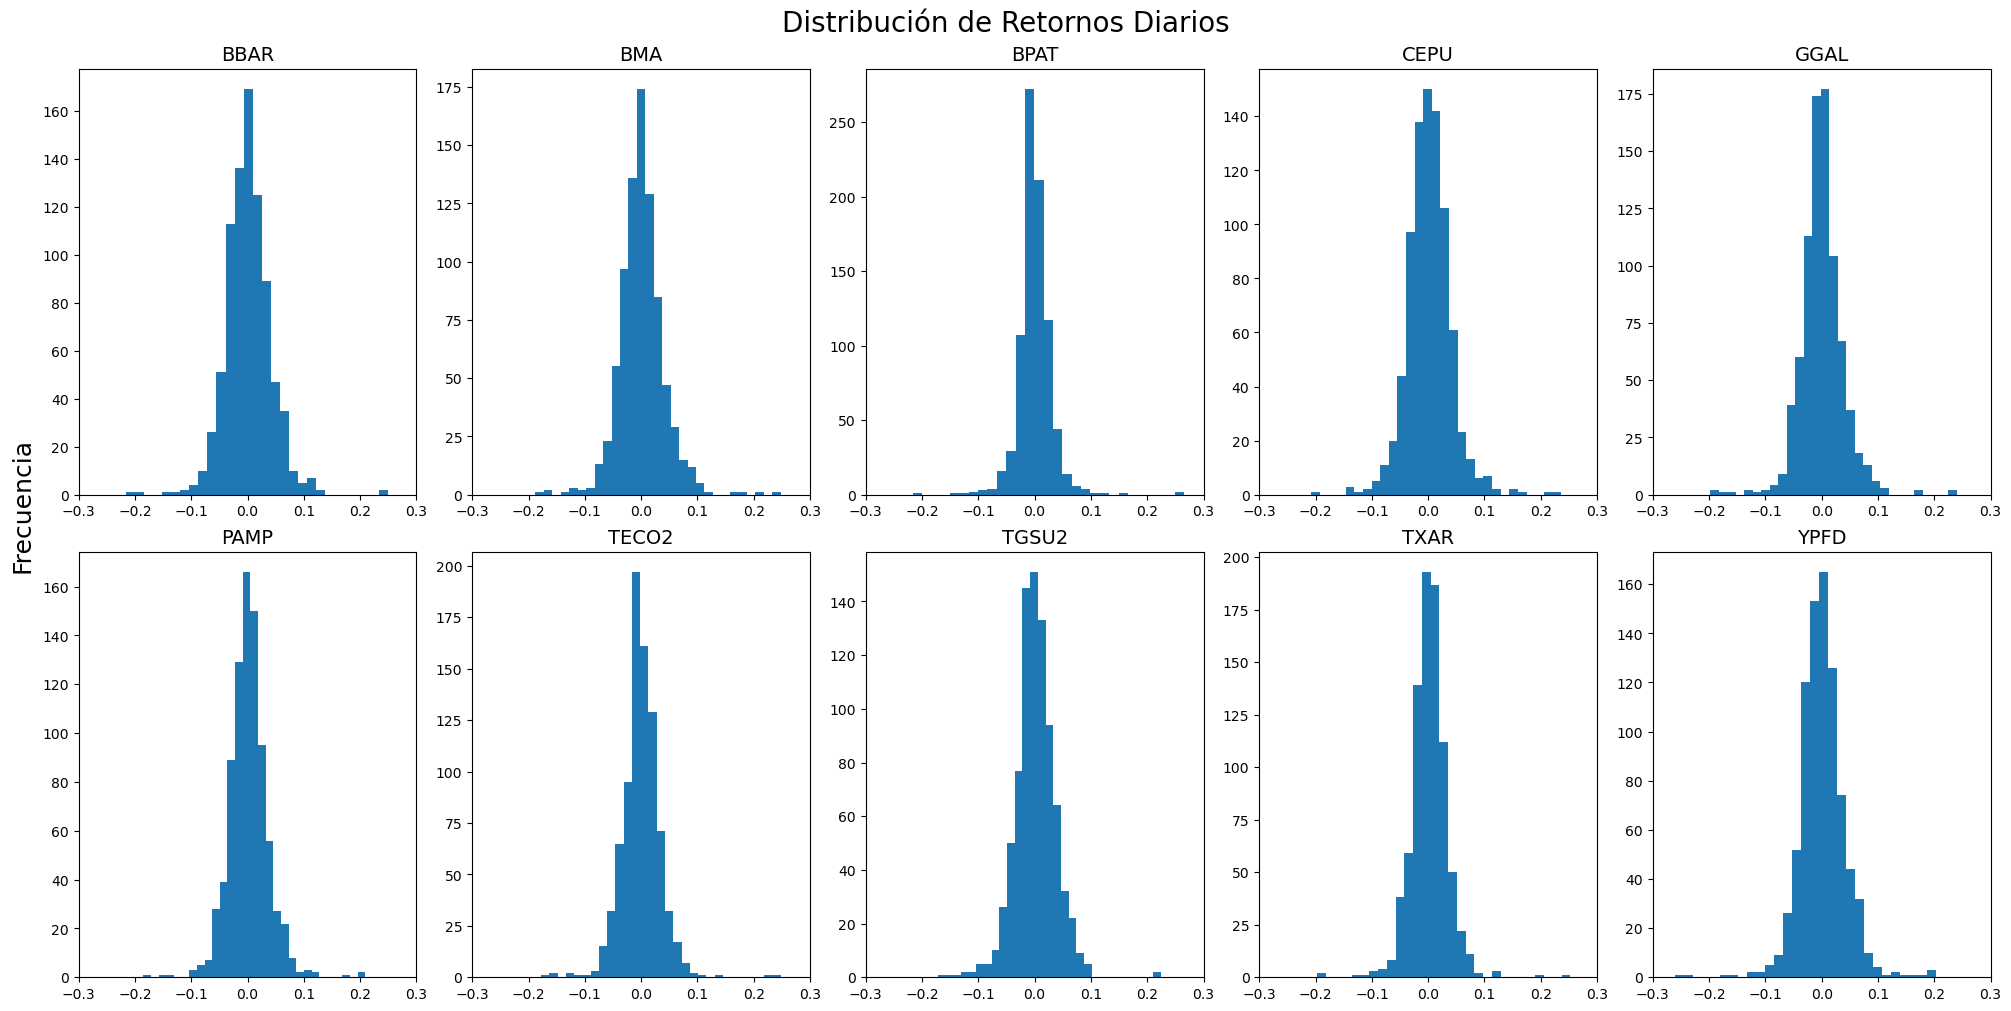

In [18]:
# Distribución de retornos

fig = plt.figure(figsize=(20, 10), constrained_layout=True)
ax_array = fig.subplots(2, 5, squeeze=False)  # Ajustado a la forma 2x5
sec_array = np.array(list(train_retornos.columns)).reshape(2, 5)  # Usar columnas de train_retornos

for i, row in enumerate(sec_array):
    for j, element in enumerate(row):
        ax_array[i, j].hist(train_retornos[sec_array[i, j]], bins='sqrt')  # Usar train_retornos
        ax_array[i, j].set_title(sec_array[i, j], fontsize=14)
        ax_array[i, j].set_xlim([-0.3, 0.3])  # Límites del eje X ajustados

# Agregar etiquetas comunes
fig.supylabel("Frecuencia", fontsize=18)

# Agregar título global
fig.suptitle("Distribución de Retornos Diarios", fontsize=20)

# Guardar la figura
plt.savefig("Figuras/Distribucion_Retornos.png", dpi=400)  # Guardar en tu directorio


### Markowitz

In [19]:
μ = np.array(media_train_retornos).reshape((len(train_retornos.columns),))
Σ = np.array(train_retornos.cov())

print(μ)
print(Σ)

[ 1.05823803e-03  6.16860033e-04  4.13632429e-04  1.73452134e-03
  8.49358488e-04  1.53564214e-03 -5.79728596e-06  1.05849750e-03
  1.79167971e-03  1.22803712e-03]
[[0.0016086  0.00137205 0.00084204 0.00112099 0.00135444 0.00099642
  0.00083751 0.00099136 0.00070043 0.00116149]
 [0.00137205 0.00153094 0.00082549 0.00108931 0.00137716 0.0009917
  0.00086057 0.00098954 0.0006724  0.00119252]
 [0.00084204 0.00082549 0.00094845 0.00067178 0.00083475 0.00061405
  0.00057987 0.00061103 0.00051631 0.00072291]
 [0.00112099 0.00108931 0.00067178 0.00151906 0.00109888 0.00095344
  0.00078764 0.00099495 0.00070034 0.00103736]
 [0.00135444 0.00137716 0.00083475 0.00109888 0.00145303 0.00096658
  0.00083819 0.00094945 0.00068035 0.00118   ]
 [0.00099642 0.0009917  0.00061405 0.00095344 0.00096658 0.00121968
  0.00069134 0.00095512 0.00060804 0.00095541]
 [0.00083751 0.00086057 0.00057987 0.00078764 0.00083819 0.00069134
  0.00113253 0.00074896 0.00053692 0.0008554 ]
 [0.00099136 0.00098954 0.000611

In [20]:
def calcular_portafolio_eficiente(μ, Σ, mu_p):
    
    # Vector de unos con longitud igual al número de filas de la matriz de varianza-covarianza
    ι = np.ones((Σ.shape[0]))

    # Calcular la matriz de información
    A = μ.T @ alg.inv(Σ) @ μ 
    B = ι.T @ alg.inv(Σ) @ μ
    C = ι.T @ alg.inv(Σ) @ ι

    I = np.array([
        [A, B],
        [B, C]
    ])

    # Calcular los pesos    
    W = 1/alg.det(I) * alg.inv(Σ) @ (C * μ - B) * mu_p + (alg.inv(Σ) @ ι) / alg.det(I) * (A - B * μ)

    return W


In [21]:
#Vector de unos
ι = np.ones((Σ.shape[0]))
    
#Matriz de informacion
A = μ.T @ alg.inv(Σ) @ μ 
B = ι.T @ alg.inv(Σ)@ μ
C = ι.T @ alg.inv(Σ) @ ι
    
I = np.array([
    [A , B],
    [B , C]
])


In [22]:
def calcular_frontera_eficiente(I, mu_p):
    """
    Esta funcion devuelve la menor varianza posible, de acuerdo a
    la frontera media-varianza, dada la Matriz de Informacion (I)
    (que depende de μ y Σ) y un retorno esperado buscado (mu_p)
    
    """
    
    
    A = I[0, 0]
    B = I[1, 0]
    C = I[1, 1]
        
    varianza_p = 1/(A*C-B**2)*(A - 2*B*mu_p + C*mu_p**2)  
    return varianza_p   

In [23]:
A = I[0, 0]
B = I[1, 0]
C = I[1, 1]

print(f"El punto de varianza mínima en la frontera eficiente tiene E(R) = {B/C:.6f} y σ = {1/C:.6f}")

El punto de varianza mínima en la frontera eficiente tiene E(R) = 0.000857 y σ = 0.000667


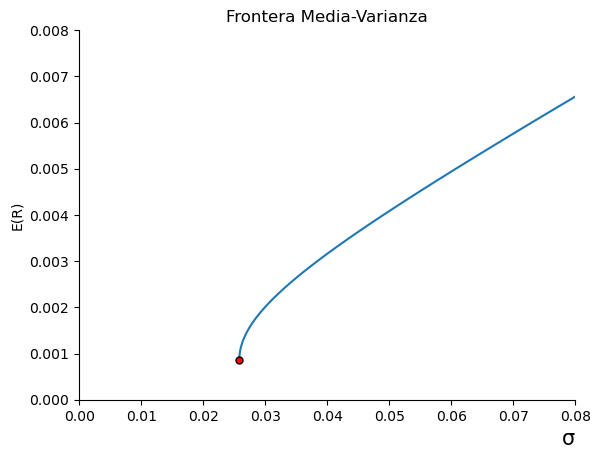

In [24]:
mu_p_top = np.linspace(B/C, 0.008, 100)
varianza_p_top = calcular_frontera_eficiente(I, mu_p_top)  

fig, ax = plt.subplots()

# Frontera eficiente sin restricciones
ax.plot(np.sqrt(varianza_p_top), mu_p_top, color="tab:blue")

ax.set_xlim([0, 0.08])
ax.set_ylim([0, 0.008])

# Estética de los ejes
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

plt.plot(1/np.sqrt(C), B/C, marker="o", markersize=5, markeredgecolor="black", markerfacecolor="red")

plt.xlabel("σ", fontdict={"fontsize": 15}, loc="right")
plt.ylabel("E(R)")

plt.title("Frontera Media-Varianza")

plt.savefig("Figuras/frontera_media_varianza.png", dpi=400)


#### Eleccion del Portafolio

In [110]:
#W Max_Sharpe

W = np.dot(np.linalg.inv(Σ), μ) / np.dot(np.ones(10), np.dot(np.linalg.inv(Σ), μ))

In [111]:
W

array([ 0.37546144, -1.10622241, -0.40992016,  0.88001093, -0.07444898,
        1.05728327, -1.19982237, -0.32365458,  1.35191448,  0.44939838])

#### Calculo de Gamma 

In [112]:
# Cálculo de Σ^-1 y del vector de unos ι
inv_Sigma = alg.inv(Σ)
ι = np.ones((Σ.shape[0], 1))

# Parte del denominador: 1' Σ^-B1 1
denominador = ι.T @ inv_Sigma @ ι

# Cálculo de la matriz R (previamente calculado)
R = inv_Sigma - (inv_Sigma @ ι @ ι.T @ inv_Sigma) / denominador

# Primera parte del cálculo de W_EU: Σ^-1 1 / (1' Σ^-1 1)
parte_1 = inv_Sigma @ ι.reshape([10,]) / denominador

# Segunda parte del cálculo de W_EU: (1 / γ) * R μ
parte_2 = R @ μ

In [113]:
gammas = (((W - parte_1) /parte_2)**(-1))
γ = gammas.mean()

In [114]:
gammas

array([[1.28533114, 1.28533114, 1.28533114, 1.28533114, 1.28533114,
        1.28533114, 1.28533114, 1.28533114, 1.28533114, 1.28533114]])

### Bayes Stein

In [115]:
retornos.shape

(1458, 10)

In [116]:
W_varianza_minima = (alg.inv(Σ) @ ι) / (ι.T @ alg.inv(Σ) @ ι)
mu_varianza_minima = B/C
varianza_minima = 1/C

T = retornos.shape[0]
N = retornos.shape[1]

estimador_covarianza = T * Σ / (T - N - 2)

h = (N + 2) / ((μ - mu_varianza_minima).T @ alg.inv(estimador_covarianza) @ (μ - mu_varianza_minima))
δ = h / (h + T)


In [119]:
mu_jorion = (1 - δ) * μ + δ * mu_varianza_minima
covarianza_jorion = (1 + 1/(T + h)) * estimador_covarianza + h/(T * (T + 1 + h)) * (np.ones([10, 10]) / (ι.T @ alg.inv(estimador_covarianza) @ ι))

# Inversión de la matriz de covarianza
inv_Sigma = np.linalg.inv(covarianza_jorion)

# Cálculo de los términos
uno = np.ones(mu_jorion.shape)  # Vector de unos con la misma dimensión que mu
numerador = inv_Sigma @ uno
denominador = uno.T @ inv_Sigma @ uno

# Cálculo de R (el ajuste para cumplir la restricción)
R = inv_Sigma - (np.outer(numerador, numerador) / denominador)

# Cálculo de los pesos de la cartera eficiente
W_jorion = numerador / denominador + (1 / γ) * R @ mu_jorion

print("Pesos óptimos W_Jorion:", W_jorion)


Pesos óptimos W_Jorion: [ 0.08677179 -0.48959434  0.10793398  0.35540125 -0.08309389  0.5376945
 -0.33046958 -0.08637842  0.72744363  0.17429109]


In [118]:
print("mu_j ", mu_jorion)
print("cov_j ", covarianza_jorion)

mu_j  [0.00093886 0.00075965 0.00067714 0.00121344 0.00085405 0.00113269
 0.00050684 0.00093896 0.00123665 0.0010078 ]
cov_j  [[0.00162267 0.0013841  0.00084954 0.00113089 0.00136633 0.00100524
  0.00084497 0.00100014 0.00070672 0.00117172]
 [0.0013841  0.00154435 0.00083285 0.00109893 0.00138925 0.00100048
  0.00086823 0.0009983  0.00067844 0.00120302]
 [0.00084954 0.00083285 0.00095686 0.00067781 0.00084219 0.00061959
  0.00058512 0.00061655 0.00052101 0.00072939]
 [0.00113089 0.00109893 0.00067781 0.00153237 0.00110859 0.00096189
  0.00079467 0.00100376 0.00070662 0.00104654]
 [0.00136633 0.00138925 0.00084219 0.00110859 0.00146577 0.00097515
  0.00084565 0.00095787 0.00068646 0.0011904 ]
 [0.00100524 0.00100048 0.00061959 0.00096189 0.00097515 0.00123042
  0.00069755 0.00096359 0.00061353 0.00096388]
 [0.00084497 0.00086823 0.00058512 0.00079467 0.00084565 0.00069755
  0.00114252 0.00075565 0.0005418  0.00086301]
 [0.00100014 0.0009983  0.00061655 0.00100376 0.00095787 0.00096359
 

### 1/N

In [102]:
W_n = np.ones(W.shape)/W.shape[0]
print(W_n)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


## Calculo de Metricas

In [103]:
def estadisticas_portafolio(W, μ, Σ):
    estadisticas = {}
    estadisticas["Media"] = np.sum(μ * W)
    
    estadisticas["Varianza"] = np.dot(W.T, np.dot(Σ, W))
    
    estadisticas["Desviación Estándar"] = np.sqrt(estadisticas["Varianza"])
    
    estadisticas["Retorno por Unidad de Riesgo"] = estadisticas["Media"]/estadisticas["Desviación Estándar"] 
    
    return estadisticas


### Markowitz

In [104]:
media_test_retornos = test_retornos.mean()
std_test_retornos = test_retornos.std()

μ_test = np.array(media_test_retornos).reshape((len(test_retornos.columns),))
Σ_test = np.array(test_retornos.cov())

estadisticas_portafolio(W, μ, Σ)

{'Media': 0.005270603302351014,
 'Varianza': 0.004100580119607605,
 'Desviación Estándar': 0.06403577218717367,
 'Retorno por Unidad de Riesgo': 0.08230717179368553}

In [105]:
estadisticas_portafolio(W, μ_test, Σ_test)

{'Media': -0.0032490285951331153,
 'Varianza': 0.006221346657129483,
 'Desviación Estándar': 0.07887551367268224,
 'Retorno por Unidad de Riesgo': -0.04119185338831441}

### Jorion

In [107]:
estadisticas_portafolio(W, μ, Σ)

estadisticas_portafolio(W_jorion, μ, Σ)

{'Media': 0.002633906302812204,
 'Varianza': 0.0012233959039190776,
 'Desviación Estándar': 0.03497707683496546,
 'Retorno por Unidad de Riesgo': 0.07530378582635505}

In [109]:
estadisticas_portafolio(W_jorion, μ_test, Σ_test)

{'Media': -0.0005204253031496303,
 'Varianza': 0.0019324775284829988,
 'Desviación Estándar': 0.04395995369063756,
 'Retorno por Unidad de Riesgo': -0.011838622643054984}

### 1/N

In [64]:
estadisticas_portafolio(W_n, μ, Σ)

{'Media': 0.0010280669498856998,
 'Varianza': 0.0009291309400267257,
 'Desviación Estándar': 0.03048164923403466,
 'Retorno por Unidad de Riesgo': 0.03372740569226809}

In [65]:
estadisticas_portafolio(W_n, μ_test, Σ_test)

{'Media': 0.0013237381844611001,
 'Varianza': 0.001208620999953239,
 'Desviación Estándar': 0.0347652268790704,
 'Retorno por Unidad de Riesgo': 0.038076500667338545}